In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = 800
t = 5
t = np.linspace(0, t, fs*t+1)

In [3]:
A = 325
f = 50
y = A*np.sin(2*f*np.pi*t)

In [4]:
yrms = np.sqrt(np.mean(y**2))
yrms

229.78098305768538

In [5]:
Y = 2*np.fft.rfft(y)/y.size

In [6]:
np.isclose(Y[0], 0)

True

In [7]:
Yrms = np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))
Yrms

229.78098305768538

In [8]:
import pandas as pd

In [9]:
def rms(y):
    Y = 2*np.fft.rfft(y)/y.size
    return np.sqrt(np.real(Y[0]**2 + np.sum(Y[1:]*np.conj(Y[1:]))/2))

In [10]:
y = np.exp(-0.1*t)*A*np.sin(2*f*np.pi*t)

In [11]:
df = pd.DataFrame(y, index=t*pd.Timedelta('1s'), columns=['signal'])
df['rms'] = df.rolling(int(fs/f)).agg(rms)

In [18]:
r = df['signal'].resample('1s').agg(rms)

In [13]:
print(df[10:16])

                     signal         rms
00:00:00.012500 -229.522621         NaN
00:00:00.013750 -299.848273         NaN
00:00:00.015000 -324.512865         NaN
00:00:00.016250 -299.773320         NaN
00:00:00.017500 -229.407889         NaN
00:00:00.018750 -124.139136  229.580142


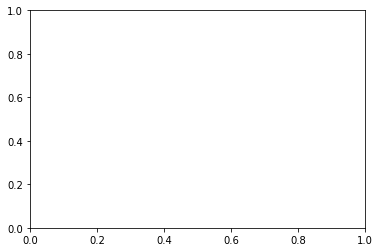

In [21]:
fig, axe = plt.subplots()